In [29]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import sys
sys.path.append("..")
from dpa.dpa_fit import MDDPA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA

In [3]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [27]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(iris.data)

In [12]:
iris.data.shape

(150, 4)

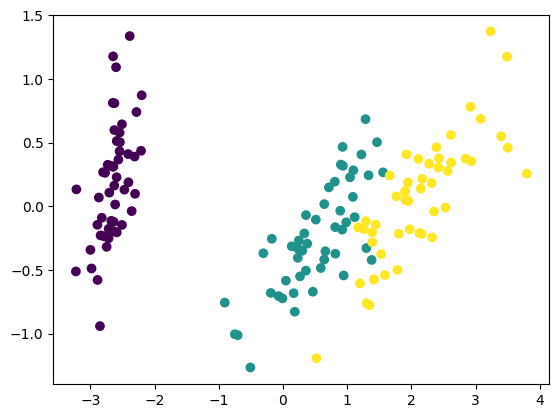

In [14]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = iris.target)

In [ ]:
dpa = MDDPA(data_dim=4, latent_dims=[4,3,2,1,0], num_layer=4, hidden_dim=100, coef_distill_latent=1e2, noise_dim=2, device=device)
dpa.train(torch.Tensor(iris.data.values), torch.Tensor(X_reduced), batch_size=50, num_epochs=1000)

Running on CPU.

Start training with 3 batches each of size 50.

[Epoch 1] 7.6970, 7.6165, 7.5338, 7.5828, 7.3624
 pred 	7.8166, 7.8070, 7.7889, 7.8477, 7.7076
 var 	0.2391, 0.3810, 0.5102, 0.5297, 0.6906

[Epoch 100] 0.2878, 0.3117, 0.6003, 0.5900, 1.4982
 pred 	0.5736, 0.7787, 1.4632, 1.6243, 2.6124
 var 	0.5715, 0.9339, 1.7259, 2.0686, 2.2283

[Epoch 200] 0.2371, 0.2910, 0.4423, 0.4133, 1.3127
 pred 	0.5058, 0.6351, 1.0959, 1.2208, 2.4602
 var 	0.5375, 0.6883, 1.3071, 1.6150, 2.2948

[Epoch 300] 0.2343, 0.2403, 0.3040, 0.4228, 1.4271
 pred 	0.4816, 0.5560, 0.7986, 1.0780, 2.4197
 var 	0.4948, 0.6315, 0.9893, 1.3104, 1.9852

[Epoch 400] 0.1845, 0.2204, 0.2980, 0.3710, 1.4013
 pred 	0.4083, 0.4821, 0.6197, 0.8990, 2.2959
 var 	0.4477, 0.5233, 0.6434, 1.0559, 1.7892

[Epoch 500] 0.1637, 0.1746, 0.2468, 0.4703, 1.2474
 pred 	0.3512, 0.4281, 0.5305, 0.9273, 2.1930
 var 	0.3749, 0.5071, 0.5673, 0.9140, 1.8911

[Epoch 600] 0.1623, 0.1855, 0.2294, 0.3217, 1.3169
 pred 	0.3144, 0.4137, 0.509

/var/folders/2q/4kcdg9gn3lbbjv6rtmgzglk00000gn/T/ipykernel_56377/530814235.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  z_dpa = np.array(dpa.encode(torch.Tensor(iris.data.values), k=2, gen_sample_size=100))


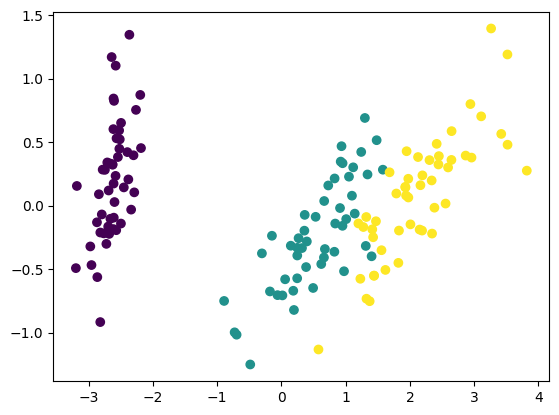

In [55]:
z_dpa = np.array(dpa.encode(torch.Tensor(iris.data.values), k=2, gen_sample_size=100))

plt.scatter(z_dpa[:, 0], z_dpa[:, 1], c = iris.target)

In [56]:
mean_squared_error(pca.inverse_transform(X_reduced),  iris.data.values)

0.02534107393239824

In [57]:
mean_squared_error(dpa.decode(torch.Tensor(z_dpa)),  iris.data.values)

0.05308168175783394

In [58]:
mean_squared_error(dpa.decode(torch.Tensor(z_dpa)),  pca.inverse_transform(X_reduced))

0.030688205248319892

In [43]:
iris.data.values.shape

(150, 4)